<a href="https://colab.research.google.com/github/KoshiBG/Python_for_data_analysis/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D1%96%D0%B7%D0%B8_%D0%BD%D0%B0_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85_Yulu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Підключення до Гугл Диску
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Імпорт бібліотек
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

#виклик файлу та обозначення дата-фрейму
data_path = '../content/drive/MyDrive/code/data/yulu_rental.csv'
df = pd.read_csv(data_path)



***Профіль колонок набору даних:***


**datetime:** дата та час зібрані погодинно

**season:** сезон (1: весна, 2: літо, 3: осінь, 4: зима)

**holiday:** чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)

**workingday:** якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.

**weather:**
Ясно, Мало хмарно, частково хмарно
Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман

**temp:** температура в градусах Цельсія

**atemp:** як відчувається температура в градусах Цельсія

**humidity:** вологість

**windspeed:** швидкість вітру

**casual:** кількість неформальних користувачів

**registered:** кількість зареєстрованих користувачів

**count:** загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів






# 1.***Взаємозв'язок між температурою та кількістю оренд в різні сезони***

**Питання:** Як температура (temp) впливає на кількість взятих велосипедів (count) в залежності від сезону?

**Підхід:**  Можна побудувати графік розсіювання (scatterplot), що покаже, як змінюється кількість оренд залежно від температури, розділивши дані за сезонами. Таке розділення покаже, чи існує певна температура, при якій в різні сезони користувачі найбільш активно беруть велосипеди.

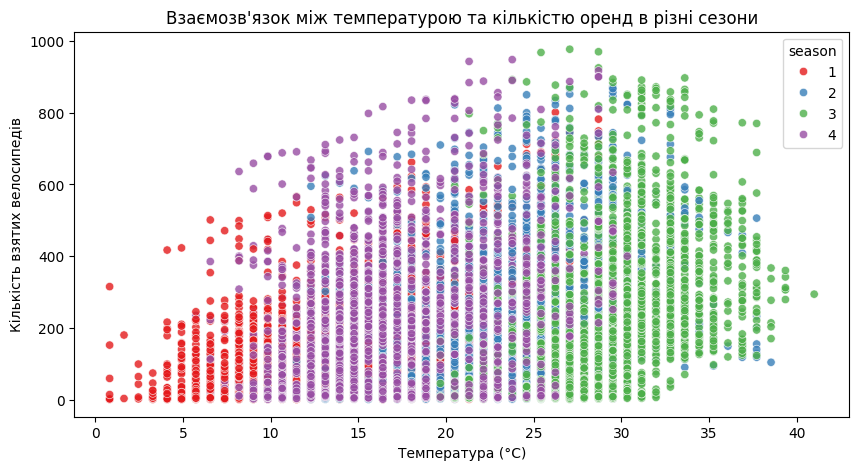

In [32]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='temp', y='count', hue='season', data=df, palette='Set1', alpha=.8)
plt.title('Взаємозв\'язок між температурою та кількістю оренд в різні сезони')
plt.xlabel('Температура (°C)')
plt.ylabel('Кількість взятих велосипедів')
plt.show()

Цей графік показує взаємозв'язок між температурою повітря та кількістю орендованих велосипедів у різні сезони. Кожна точка на графіку представляє одну годину, а її колір відповідає сезону (1 — весна, 2 — літо, 3 — осінь, 4 — зима).

**Основні спостереження:**
Позитивна кореляція між температурою та кількістю оренд: В загальному, чим вища температура, тим більше оренд велосипедів, особливо в діапазоні від 15 до 25°C.

***Зимові місяці (сезон 4, фіолетовий):*** Кількість оренд в зимовий сезон, коли температура низька (нижче 10°C), значно менша. Це може бути пояснено несприятливими погодними умовами для їзди на велосипеді.

***Літні місяці (сезон 2, зелений):*** Літо демонструє найбільшу кількість оренд при температурах від 20 до 30°C. Це логічно, оскільки літо є найбільш сприятливим сезоном для велосипедних прогулянок.

***Осінь та весна (сезони 3 і 1):*** Весняний та осінній сезони мають приблизно схожі патерни з дещо меншою кількістю оренд порівняно з літом, але більшою кількістю оренд, ніж взимку.

**Висновки:**
Влітку та восени (особливо при температурі 15-30°C) оренда велосипедів стає найбільш популярною.
У зимовий сезон, коли температура нижча за 10°C, кількість оренд значно зменшується.
Цей аналіз може бути корисним для оптимізації ресурсів, наприклад, збільшення кількості доступних велосипедів у теплі місяці та зниження в холодні.

# 2.***Як змінюється кількість взятих на прокат велосипедів протягом дня?***

**Питання:** Як кількість взятих на прокат велосипедів змінюється протягом дня, зокрема в робочі та вихідні дні?

**Підхід:** Для цього питання можна побудувати лінійний графік, який показуватиме зміну кількості взятих велосипедів протягом кожної години для робочих та святкових днів. Це допоможе виявити пікові години прокату.

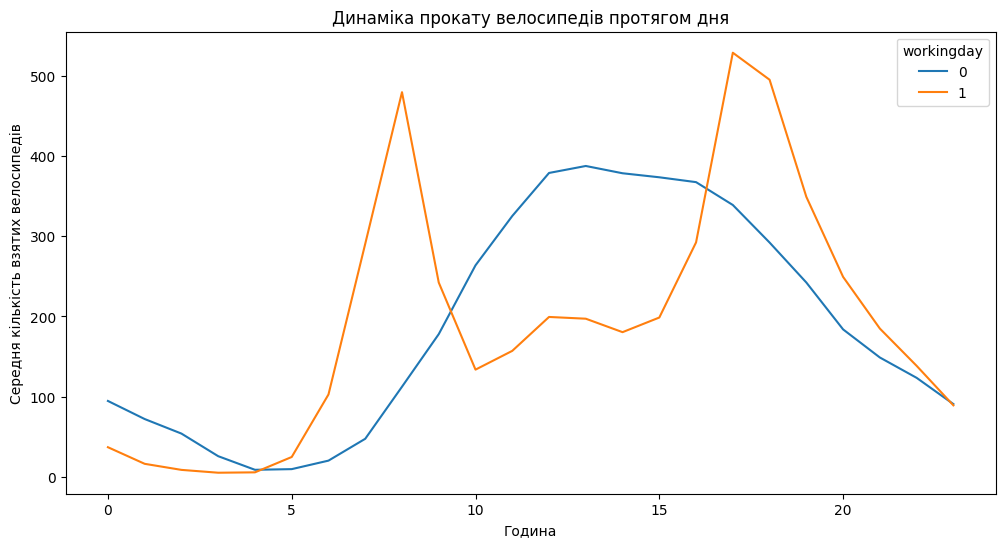

In [23]:
# Додаємо нову колонку з годиною
df['hour'] = df['datetime'].dt.hour

# Групуємо за годинами і статусом робочого дня
df_hourly = df.groupby(['hour', 'workingday'])['count'].mean().unstack()

# Візуалізація
df_hourly.plot(kind='line', figsize=(12, 6), title="Динаміка прокату велосипедів протягом дня")
plt.xlabel('Година')
plt.ylabel('Середня кількість взятих велосипедів')
plt.show()

*Цей графік показує динаміку середньої кількості взятих велосипедів протягом дня для робочих днів (позначено помаранчевою лінією) і вихідних/святкових днів (синя лінія). Ось ключові моменти:*

***Основні спостереження:***

***Пікові години в робочі дні (помаранчева лінія):***

Ранковий пік близько 8-9 години. Це період, коли більшість людей використовують велосипеди для поїздок на роботу або навчання.
Вечірній пік близько 17-18 години. Після завершення робочого дня люди знову активно беруть велосипеди для поїздок додому.
У робочі дні можна чітко бачити дві виражені хвилі: зранку та ввечері, що відповідає типовим робочим графікам.

*Динаміка в неробочі дні (синя лінія):* **текст жирним шрифтом**

У вихідні або святкові дні активність на початку дня (з 7:00 до 9:00) значно нижча. Це вказує на те, що користувачі не мають потреби в ранкових поїздках на роботу.
Замість цього активність починає рости після 10 години, досягаючи максимуму в районі 14:00–15:00. Це вказує на те, що у вихідні та святкові дні велосипеди використовуються більше для дозвілля або подорожей протягом дня.

***Спільна тенденція:***

Після 20:00 як у робочі, так і у вихідні дні кількість оренд знижується, що свідчить про завершення активного часу дня.
Висновки:
У робочі дні люди найчастіше беруть велосипеди в години, що співпадають з початком і кінцем робочого дня, тобто для ком'ютінгу (поїздок на роботу або навчання).
У вихідні спостерігається інша динаміка: активність поступово збільшується до середини дня, що може бути пов'язано з рекреаційними поїздками або вихідними активностями.

***Оптимізація ресурсів:*** Компанія може використати ці дані для ефективного управління кількістю доступних велосипедів у різні години дня та дні тижня

# 3.***Як день тижня впливає на кількість зареєстрованих та казуальних користувачів?***

**Питання:** Яка різниця в середній кількості зареєстрованих та казуальних користувачів у дні тижня?

**Підхід:** Для цього можна побудувати стовпчасту діаграму, яка покаже середню кількість користувачів за кожен день для зареєстрованих та казуальних користувачів. Це допоможе побачити, які дні є більш популярними для користування сервісом.

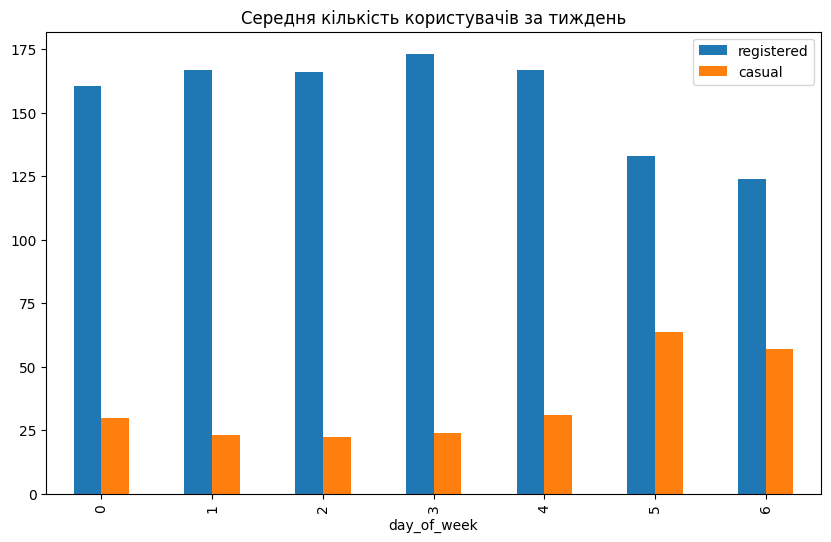

In [44]:
# Перетворення колонки datetime на формат datetime
df['datetime'] = pd.to_datetime(df['datetime'])

# Витягуємо день тижня з колонки datetime (0 - понеділок, 6 - неділя)
df['day_of_week'] = df['datetime'].dt.dayofweek

# Групуємо дані за сезонами і обчислюємо середнє для зареєстрованих та казуальних користувачів
df_season = df.groupby('day_of_week')[['registered', 'casual']].mean().reset_index()

# Візуалізація
df_season.plot(kind='bar', x='day_of_week', y=['registered', 'casual'], figsize=(10, 6), title="Середня кількість користувачів за тиждень");

***Цей стовпчастий графік показує середню кількість зареєстрованих (синя лінія) та неформальних (помаранчева лінія) користувачів за днями тижня (0 відповідає понеділку, 6 — неділі).***

***Основні спостереження:***

**1. Зарестровані користувачі (сині стовпці):**

Протягом робочих днів (0-4) кількість зареєстрованих користувачів стабільно висока, з незначними коливаннями. Це вказує на те, що зареєстровані користувачі активно орендують велосипеди для щоденних поїздок на роботу або навчання.
У суботу (5) та неділю (6) кількість зареєстрованих користувачів дещо зменшується, але залишається значною.

**2. Неформальні користувачі (помаранчеві стовпці):**

Неформальні користувачі мають низьку активність протягом робочих днів, але кількість їх різко зростає у вихідні дні (субота і неділя). Це вказує на те, що вони найчастіше орендують велосипеди для рекреаційних поїздок у вихідні дні.

 **3**.**Загальна тенденція:**

Зарестровані користувачі домінують протягом робочого тижня і залишаються активними навіть у вихідні, хоча їх кількість дещо знижується.
Неформальні користувачі переважно орендують велосипеди у вихідні дні, що підтверджує їх схильність до використання велосипедів для відпочинку та дозвілля.

***Висновки:***

Зарестровані користувачі значною мірою використовують велосипеди як транспортний засіб протягом робочого тижня.
Неформальні користувачі активніші у вихідні, що свідчить про їх інтерес до рекреаційних поїздок на велосипеді.
Компанія може збільшити кількість доступних велосипедів у вихідні, враховуючи зростання попиту серед неформальних користувачів у ці дні.